In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [40]:
op_gap_dnl = np.load('op_gap_dnl.npy').ravel()
op_gap_dnl_q = np.load('op_gap_dnl_q.npy').ravel()

op_gap_dsgd = np.load('op_gap_dsgd.npy').ravel()
op_gap_newton_tracking = np.load('op_gap_newton_tracking.npy').ravel()
op_gap_nn = np.load('op_gap_nn.npy').ravel()

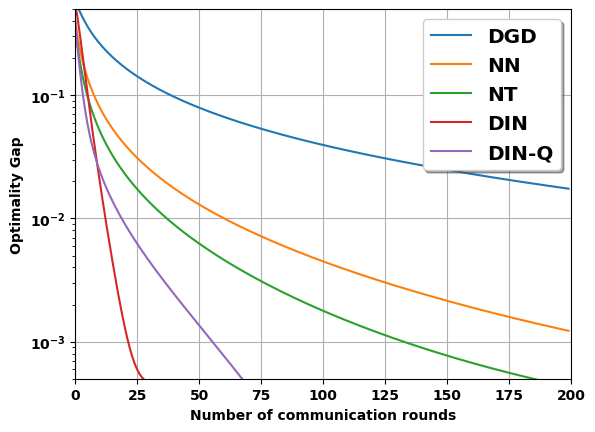

In [11]:
plt.semilogy(op_gap_dsgd, label='DGD') # Descentralized Gradient Descent
plt.semilogy(op_gap_nn, label='NN') # Network Newton
plt.semilogy(op_gap_newton_tracking, label='NT') # Newton Tracking
plt.semilogy(op_gap_dnl, label='DIN') # Ours
plt.semilogy(op_gap_dnl_q, label='DIN-Q') # Ours


plt.xlabel('Number of communication rounds')
plt.ylabel('Optimality Gap')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.ylim([5 * 10**(-4),0.5])
plt.xlim([0, 200])
plt.savefig("Optimality Gap.pdf")

(0.0, 6000.0)

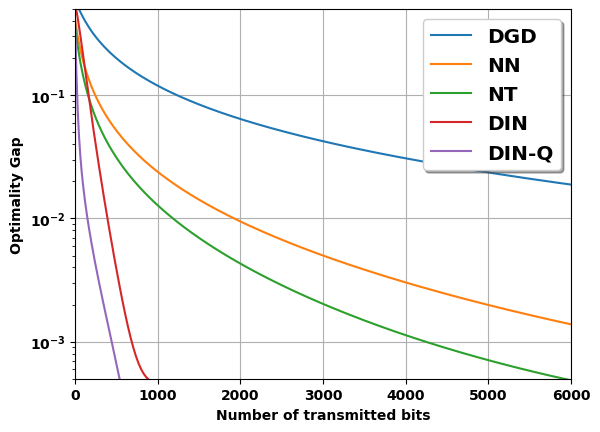

In [53]:
import matplotlib.ticker as ticker

x = [32 * i  for i in range(0, 200)]
x_q = [8 * i  for i in range(0, 200)]
plt.semilogy(x, op_gap_dsgd, label='DGD') # Descentralized Gradient Descent
plt.semilogy(x, op_gap_nn, label='NN') # Network Newton
plt.semilogy(x, op_gap_newton_tracking, label='NT') # Newton Tracking
plt.semilogy(x, op_gap_dnl, label='DIN') # Ours
plt.semilogy(x_q, op_gap_dnl_q, label='DIN-Q') # Ours

def scientific_formatter(x, pos):
    # Format as 10^x
    return r'${10^{%d}}$' % np.log10(x) if x > 0 else '0'

plt.xlabel('Number of transmitted bits')
plt.ylabel('Optimality Gap')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.ylim([5 * 10**(-4),0.5])
plt.xlim([0, 6000])
# Apply the custom formatter to the x-axis
#plt.ticklabel_format(style='sci', axis='x', scilimits=(1,1))

#plt.ticklabel_format(style='sci', axis='x', scilimits=(1,1))
#plt.savefig("Optimality Gap.pdf")

C:\Users\aghalkha21\AppData\Local\Temp\ipykernel_32352\3743665150.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$10^{'+str(int(np.log10(tick)))+'}$' if tick > 0 else '0' for tick in xticks])


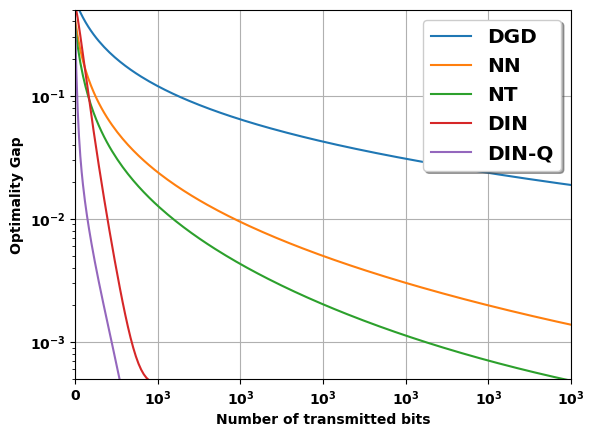

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


x = [32 * (i - 1) for i in range(1, 201)]
x_q = [8 * (i - 1) for i in range(1, 201)]

# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.semilogy(x, op_gap_dsgd, label='DGD')  # Descentralized Gradient Descent
ax.semilogy(x, op_gap_nn, label='NN')  # Network Newton
ax.semilogy(x, op_gap_newton_tracking, label='NT')  # Newton Tracking
ax.semilogy(x, op_gap_dnl, label='DIN')  # Ours
ax.semilogy(x_q, op_gap_dnl_q, label='DIN-Q')  # Ours

# Set the y axis ticks to 10^x (exponential scale)
ax.set_xlim([0, 6000])

# Set x-axis to scientific notation for ticks
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: '{:.0e}'.format(x)))

# Retrieve x-ticks and format them as 10^x
xticks = ax.get_xticks()
ax.set_xticklabels(['$10^{'+str(int(np.log10(tick)))+'}$' if tick > 0 else '0' for tick in xticks])

# Set labels and legend
ax.set_xlabel('Number of transmitted bits')
ax.set_ylabel('Optimality Gap')
ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Display grid
ax.grid(True)

# Set y-axis limits
ax.set_ylim([5 * 10**(-4), 0.5])

# Show the plot
plt.show()